In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [18]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/archive/emptyballs/train'
test_dir = '/content/drive/MyDrive/archive/emptyballs/test'


In [10]:
import os

print(len(os.listdir('/content/drive/MyDrive/archive/emptyballs/train/balls')))
print(len(os.listdir('/content/drive/MyDrive/archive/emptyballs/train/empty')))
print(len(os.listdir('/content/drive/MyDrive/archive/emptyballs/test/balls')))
print(len(os.listdir('/content/drive/MyDrive/archive/emptyballs/test/empty')))


406
417
40
40


In [5]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.3 MB/s eta 0:00:00


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (balls vs. empty)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 659 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [12]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [14]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [20]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.4908 - loss: 0.8857 - val_accuracy: 0.6280 - val_loss: 0.6400
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.6600 - loss: 0.6108 - val_accuracy: 0.5732 - val_loss: 0.6550
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.7399 - loss: 0.4956 - val_accuracy: 0.6829 - val_loss: 0.6480
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.8521 - loss: 0.3750 - val_accuracy: 0.6280 - val_loss: 0.7555
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.9210 - loss: 0.1919 - val_accuracy: 0.5976 - val_loss: 1.0498
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.9068 - loss: 0.1998 - val_accuracy: 0.6280 - val_loss: 1.3281
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.9808 - loss: 0.0698 - val_accuracy: 0.6707 - val_loss: 1.3011
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.9965 - loss: 0.0238 - val_accuracy: 0.6159 - val_loss

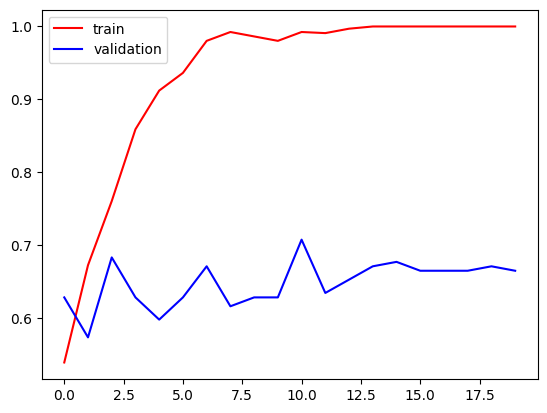

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

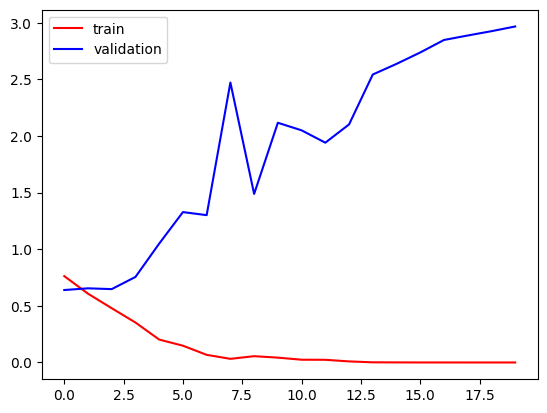

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [25]:
#predict the test data
predictions = model.predict(test_data)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[21 19]
 [20 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        40
           1       0.51      0.50      0.51        40

    accuracy                           0.51        80
   macro avg       0.51      0.51      0.51        80
weighted avg       0.51      0.51      0.51        80



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [27]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 161s 8s/step - accuracy: 0.5756 - loss: 6.5653 - val_accuracy: 0.5061 - val_loss: 1.7076
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.6928 - loss: 4.2121 - val_accuracy: 0.5000 - val_loss: 2.8619
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.7712 - loss: 3.0588 - val_accuracy: 0.5488 - val_loss: 1.6070
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.8366 - loss: 1.3128 - val_accuracy: 0.5610 - val_loss: 2.3075
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.8079 - loss: 1.7301 - val_accuracy: 0.4756 - val_loss: 5.4068
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.8856 - loss: 0.9627 - val_accuracy: 0.5366 - val_loss: 4.2968
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.8758 - loss: 1.6060 - val_accuracy: 0.4939 - val_loss: 14.3278
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.9149 - loss: 0.7149 - val_accuracy: 0.4939 - 

In [33]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [34]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 805ms/step


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 9 31]
 [11 29]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.45      0.23      0.30        40
           1       0.48      0.72      0.58        40

    accuracy                           0.47        80
   macro avg       0.47      0.47      0.44        80
weighted avg       0.47      0.47      0.44        80



Using Pre-trained model - Resnet

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [36]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 185s 9s/step - accuracy: 0.6171 - loss: 1.6419 - val_accuracy: 0.5793 - val_loss: 0.7593
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 176s 8s/step - accuracy: 0.6123 - loss: 0.7730 - val_accuracy: 0.5854 - val_loss: 0.7771
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 174s 8s/step - accuracy: 0.7251 - loss: 0.4905 - val_accuracy: 0.6098 - val_loss: 0.8285
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 174s 8s/step - accuracy: 0.7979 - loss: 0.4587 - val_accuracy: 0.5183 - val_loss: 0.9831
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 174s 8s/step - accuracy: 0.7936 - loss: 0.4607 - val_accuracy: 0.5366 - val_loss: 0.9289
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 174s 8s/step - accuracy: 0.7990 - loss: 0.4557 - val_accuracy: 0.6037 - val_loss: 0.8815
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 174s 8s/step - accuracy: 0.7912 - loss: 0.4619 - val_accuracy: 0.6037 - val_loss: 0.7889
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 174s 8s/step - accuracy: 0.8337 - loss: 0.4105 - val_accuracy: 0.5000 - v

In [38]:
predictions = resnet_model.predict(test_data)

2/3 ━━━━━━━━━━━━━━━━━━━━ 6s 7s/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 8 32]
 [ 6 34]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.57      0.20      0.30        40
           1       0.52      0.85      0.64        40

    accuracy                           0.53        80
   macro avg       0.54      0.53      0.47        80
weighted avg       0.54      0.53      0.47        80

